In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Lambda
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.initializers import glorot_normal
from keras.utils import np_utils
#from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
import pickle
import random

Using TensorFlow backend.


In [4]:

DATADIR = "/Users/bidhanbashyal/Acoustic/TrainingData"

In [5]:

CATEGORIES = ["Airport", "Bus","Mall","Metro", "Metrostation", 
              "Park", "Pedestrain", "Square", 
              "StreetTraffic", "Tram"]

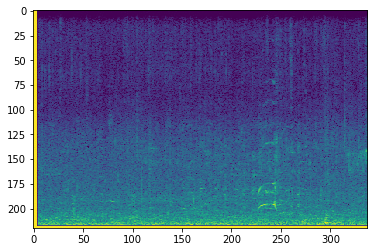

In [6]:
for category in CATEGORIES: 
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
        plt.show()

        break 
    break  

In [7]:
print(img_array)

[[255 255 255 ...   0   0   1]
 [254 255 255 ...   1   0   1]
 [254 255 255 ...   0   0   0]
 ...
 [255 254 254 ...  50  52  52]
 [253 255 253 ... 255 255 255]
 [254 255 255 ... 254 255 255]]


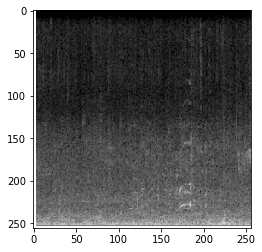

In [8]:
IMG_SIZE1 =256
IMG_SIZE2 = 256
#IMG_SIZE1=338
#IMG_SIZE2=220

new_array = cv2.resize(img_array, (IMG_SIZE1, IMG_SIZE2))
plt.imshow(new_array, cmap='gray')
plt.show()


In [13]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE1, IMG_SIZE2)) 
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
          

In [14]:
create_training_data()

100%|██████████| 551/551 [00:02<00:00, 219.16it/s]


In [17]:
print(len(training_data))

5499


In [18]:
random.shuffle(training_data)

In [19]:
for sample in training_data[:20]:
    print(sample[1])

6
0
5
4
8
5
6
4
7
6
5
2
1
2
9
0
1
2
2
5


In [20]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE1, IMG_SIZE2, 1)

In [21]:
print(X[0].reshape(-1, IMG_SIZE1, IMG_SIZE2, 1))

[[[[255]
   [255]
   [255]
   ...
   [  1]
   [  0]
   [  0]]

  [[254]
   [255]
   [255]
   ...
   [  0]
   [  0]
   [  0]]

  [[254]
   [255]
   [255]
   ...
   [  0]
   [  0]
   [  0]]

  ...

  [[255]
   [255]
   [255]
   ...
   [122]
   [123]
   [121]]

  [[254]
   [254]
   [255]
   ...
   [254]
   [254]
   [253]]

  [[255]
   [254]
   [255]
   ...
   [255]
   [254]
   [255]]]]


In [22]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [23]:
X[1]

array([[[255],
        [255],
        [254],
        ...,
        [  0],
        [  0],
        [  0]],

       [[254],
        [255],
        [255],
        ...,
        [  3],
        [  2],
        [  1]],

       [[254],
        [254],
        [254],
        ...,
        [  1],
        [  1],
        [  1]],

       ...,

       [[255],
        [254],
        [253],
        ...,
        [125],
        [123],
        [120]],

       [[254],
        [254],
        [254],
        ...,
        [254],
        [254],
        [254]],

       [[253],
        [255],
        [253],
        ...,
        [253],
        [255],
        [255]]], dtype=uint8)

In [24]:
X[1]

array([[[255],
        [255],
        [254],
        ...,
        [  0],
        [  0],
        [  0]],

       [[254],
        [255],
        [255],
        ...,
        [  3],
        [  2],
        [  1]],

       [[254],
        [254],
        [254],
        ...,
        [  1],
        [  1],
        [  1]],

       ...,

       [[255],
        [254],
        [253],
        ...,
        [125],
        [123],
        [120]],

       [[254],
        [254],
        [254],
        ...,
        [254],
        [254],
        [254]],

       [[253],
        [255],
        [253],
        ...,
        [253],
        [255],
        [255]]], dtype=uint8)

num_classes=10

In [25]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
X=X/255.0

model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=X.shape[1:]))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(4096))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Lambda(lambda x: K.tf.nn.softmax(x)))
sgd = SGD(lr=0.1, decay=1e-6, nesterov=True)

In [26]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Train on 3849 samples, validate on 1650 samples
Epoch 1/3
3849/3849 [==============================] - 101513s 26s/step - loss: 2.3036 - acc: 0.0982 - val_loss: 2.3039 - val_acc: 0.0897
Epoch 2/3
2784/3849 [====================>.........] - ETA: 5:59:43 - loss: 2.2964 - acc: 0.1164